# <center>CHE1147 Data Mining in Engineering</center>

## <center>Assignment 2</center>


#### <center>Yunjie Xu 1008601951</center>    

## 1 Criminal investigation
### 1.1 Introduction
You are a member of the Data Science team in the Crime Investigation Unit of Toronto
Police. The incoming and outgoing phone calls of a suspect over a few months period are
given to you for analysis. Your manager has asked you to answer the following questions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
df = pd.read_excel('phone_data.xlsx')
df

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0
...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00


### 1.2 Most and least frequent outgoing numbers
1. Identify the 3 numbers with the most **counts** of outgoing calls.
2. Identify the numbers with the least **counts of** outgoing calls. If there are ties (e.g. 1
phone call for many numbers) then identify all numbers.

**Final answer format:** two tables that include two columns: the numbers the suspect
called; the counts of times the respective numbers were called.

In [3]:
NumberCounts = df[df['Call type']=='Outgoing'].loc[:,'Number called (to/from)'].value_counts()
NumberCounts

A_1    111
A_5     48
B_3     28
A_4     12
B_2      4
C_4      3
B_4      3
E_1      3
E_3      3
D_3      2
A_2      2
C_5      2
G_1      2
E_2      2
C_2      2
B_1      2
A_3      2
D_4      2
F_2      1
F_4      1
F_3      1
E_5      1
F_5      1
F_1      1
D_2      1
E_4      1
D_5      1
D_1      1
C_3      1
C_1      1
B_5      1
G_2      1
Name: Number called (to/from), dtype: int64

In [4]:
# 1.2.1
# Identify the 3 numbers with the most counts of outgoing calls.
pd.DataFrame({'Numbers Called':NumberCounts[['A_1','A_5','B_3']].index, 'Count of Times':NumberCounts[['A_1','A_5','B_3']].values})


,Numbers Called,Count of Times
0,A_1,111
1,A_5,48
2,B_3,28


In [5]:
# 1.2.2
# Identify the numbers with the least counts of outgoing calls. If there are ties (e.g. 1 phone call for many numbers) then identify all numbers.
pd.DataFrame({'Numbers Called':NumberCounts[NumberCounts<2].index, 'Count of Times':NumberCounts[NumberCounts<2].values})


,Numbers Called,Count of Times
0,F_2,1
1,F_4,1
2,F_3,1
3,E_5,1
4,F_5,1
5,F_1,1
6,D_2,1
7,E_4,1
8,D_5,1
9,D_1,1


### 1.3 Highest and lowest total duration of outgoing calls
1.Repeat the same exercise as in the previous subsection, but with the total **duration
per number** called.

**Final answer format:** two tables that include two columns: the numbers the suspect
called; the total duration (i.e. sum) each number were called in the period given.

In [6]:
NumberCounts = df[df['Call type']=='Outgoing'].groupby('Number called (to/from)')['Duration'].sum().sort_values(ascending=False)
NumberCounts

Number called (to/from)
A_1    1146
A_5     427
A_4      96
A_3      81
C_4      37
B_3      33
F_2      32
F_1      17
B_5      16
G_1      15
F_3      12
B_2      11
D_3      10
E_3      10
B_4       8
E_1       7
G_2       6
C_3       6
C_2       6
E_2       3
C_5       3
F_4       3
F_5       3
A_2       2
D_4       2
D_1       2
B_1       2
D_2       2
D_5       1
E_4       1
E_5       1
C_1       1
Name: Duration, dtype: int64

In [7]:
# Identify the 3 numbers with the longest duration of outgoing calls.
pd.DataFrame({'Numbers Called':NumberCounts[['A_1','A_5','A_4']].index, 'Total Duration':NumberCounts[['A_1','A_5','A_4']].values})


,Numbers Called,Total Duration
0,A_1,1146
1,A_5,427
2,A_4,96


In [8]:
# Identify the numbers with the least counts of outgoing calls. If there are ties (e.g. 1 phone call for many numbers) then identify all numbers.
pd.DataFrame({'Numbers Called':NumberCounts[NumberCounts<2].index, 'Total Duration':NumberCounts[NumberCounts<2].values})


,Numbers Called,Total Duration
0,D_5,1
1,E_4,1
2,E_5,1
3,C_1,1


### 1.4 Location of outgoing calls
1. What are the number of counts for every location of outgoing calls?
**Final answer format:** a table that includes two columns: the location of the outgoing call; the counts of outgoing calls per location.

In [9]:
# 1.4.1 when the location is 'From city	'
NumberCounts = df[df['Call type']=='Outgoing'].loc[:,'From city'].value_counts()
pd.DataFrame({'Location':NumberCounts.index, 'Counts':NumberCounts.values})

,Location,Counts
0,TORONTO ON,244
1,NEWMARKET ON,2
2,CLAREMONT ON,1


In [10]:
# 1.4.1 when the location is 'To city'
NumberCounts = df[df['Call type']=='Outgoing'].loc[:,'To city'].value_counts()
pd.DataFrame({'Location':NumberCounts.index, 'Counts':NumberCounts.values})

,Location,Counts
0,TORONTO ON,199
1,OAK RIDGES ON,28
2,RICHMONDHL ON,10
3,THORNHILL ON,3
4,800 SERV SERV 800 ON,1
5,AURORA ON,1
6,STOUFFVL ON,1
7,866 SERV SERV 866 ON,1
8,888 SERV SERV 888 ON,1
9,877 SERV SERV 877 ON,1


### 1.5 Incoming and Outgoing calls pattern
1. Calculate the **total duration** of incoming and outgoing calls per month.
2. Plot the results in one graph for both incoming and outgoing calls.
3. Do you see anything unusual in the pattern? E.g. does this look like a phone line that was used for criminal activities or more like a personal phone?

**Final answer format #1:** a table that includes three columns: the month, the total duration of the incoming calls per month; the total duration of the outgoing calls per month.

**Final answer format #2:** a plot of the table in #1 with two lines and square symbols to show the data with the plot legend showing which line is incoming and which line is outgoing. 

**Hint for #3:** Use all the information you derived in the previous questions.

In [11]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
df

,Date,Start time,From city,To city,Number called (to/from),Call type,Duration,Grand Total,Month
0,10-14-2019,12:53:34 PM,INCOMING ON,TORONTO ON,Unknown caller,Incoming,1,0,10
1,10-13-2019,11:47:28 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,7,0,10
2,10-13-2019,11:46:53 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0,10
3,10-13-2019,11:46:15 AM,TORONTO ON,TORONTO ON,A_2,Outgoing,1,0,10
4,10-11-2019,07:03:08 PM,TORONTO ON,TORONTO ON,A_3,Outgoing,37,0,10
...,...,...,...,...,...,...,...,...,...
333,10-15-2019,11:41:22 AM,TORONTO ON,TORONTO ON,A_5,Outgoing,1,$0.00,10
334,10-15-2019,11:11:44 AM,TORONTO ON,TORONTO ON,D_3,Outgoing,9,$0.00,10
335,10-15-2019,11:06:17 AM,TORONTO ON,TORONTO ON,A_4,Outgoing,4,$0.00,10
336,10-15-2019,11:05:05 AM,TORONTO ON,TORONTO ON,A_1,Outgoing,1,$0.00,10


In [12]:
#1.5.1
# Call type is 'Outgoing'
NumberCounts_out = df[df['Call type']=='Outgoing'].groupby('Month')['Duration'].sum().sort_index()
# Call type is 'Incoming'
NumberCounts_in = df[df['Call type']=='Incoming'].groupby('Month')['Duration'].sum().sort_index()

# Calculate the total duration of incoming and outgoing calls per month.
table = pd.DataFrame({'Month':NumberCounts_out.index, 'Duration of Outgoing':NumberCounts_out, 'Duration of Incoming':NumberCounts_in})
table.reset_index(drop=True, inplace=True) ## drop original series' index column
table

,Month,Duration of Outgoing,Duration of Incoming
0,7,190,84
1,8,281,54
2,9,714,244
3,10,621,63
4,11,196,87


Text(0, 0.5, 'Total Duration')

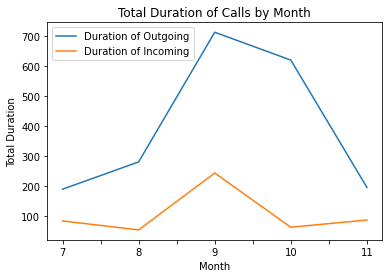

In [13]:
# 1.5.2
# Plot the results in one graph for both incoming and outgoing calls.
table['Month'] = table['Month'].astype(str)
table.plot(x='Month')
plt.title('Total Duration of Calls by Month')
plt.ylabel('Total Duration')

**1.5.3** Do you see anything unusual in the pattern? E.g. does this look like a phone line that was used for criminal activities or more like a personal phone?


<div style='color:green'> By looking the line plot above, we can make some conclusions. Firstly,the total outgoing duration is much bigger than the incoming ones and allphonecalls coverge on July to November. Secondly, the September and October are peak periods of phonecalls. One interesting thing is that this dataset records all callers with names only have outgoing records and all incoming callers is from the type of 'Unknown caller'. I am not sure the causes of the phenomenon are absence of data or these callers with name only dialed-out. If these callers especially A_1,A_5 and A_4 only dialed-out and never recived phonecalls at a certain period, I think that these phone line was likely to used for criminal activities. Becuase these situations are very unusual.

In [14]:
NumberCounts = df[df['Call type']=='Incoming'].loc[:,'Number called (to/from)'].value_counts()
pd.DataFrame({'Numbers Called':NumberCounts.index, 'Total Duration':NumberCounts.values})

,Numbers Called,Total Duration
0,Unknown caller,91


### 1.6 Distribution of calls
Plot the histogram of the **outbound call counts**; e.g. x-axis: the call counts per client
called, y-axis: number of clients called.


Text(0, 0.5, 'number of clients called')

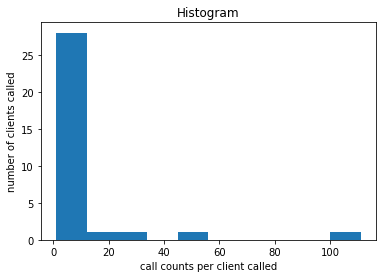

In [15]:
df[df['Call type'] == 'Outgoing'].groupby('Number called (to/from)').size().plot.hist()
plt.title('Histogram')
plt.xlabel('call counts per client called')
plt.ylabel('number of clients called')

Text(0, 0.5, 'number of clients called')

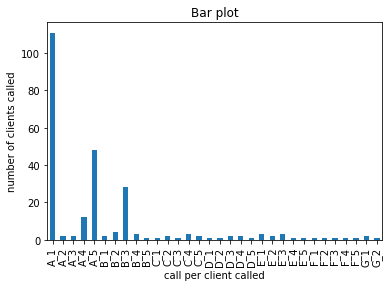

In [16]:
df[df['Call type'] == 'Outgoing'].groupby('Number called (to/from)').size().plot.bar()
plt.title('Bar plot')
plt.xlabel('call per client called')
plt.ylabel('number of clients called')

## 2 The ergodicity problem in economics
### 2.1 Introduction
Here, we will reproduce some simulations from a simple gambling experiment used in the recent paper ”The ergodicity problem in economics” by Ole Peters (for a simpler description of the problem and its implications refer to the Bloomberg article here).

  Ergodicity is a term used mainly in equilibrium statistical mechanics and in many other areas including economics. A process is called ergodic if the time average and the expectation value are equal. The author, a physicist who specializes in statistical mechanics, claims that its use in economics is abusive and it has led to the narrative of human irrationality.
  
### 2.2 The statistical problem
Starting with an initial wealth of 100$, you engage into a simple coin-flipping game in which your wealth increases by 50% every time you flip heads and you lose 40% if you flip tails. Since tossing heads or tails is just as likely, it makes sense to accept such a game if you play enough times because your potential gain is larger than your potential loss each time you play. Yet, as we will see this is a paradox.

### 2.3 Coding the problem
Below is a description of a simple set of steps you can follow to code this problem. It is not optimal for computation, but it is simple to understand the steps. If you want to follow a different logic
1. Generate a pandas dataframe that simulates N coin tosses for w gamblers with the np.random.rand function. Set **N**=100 coin tosses and **w**=100 gamblers and add the prefix ’prob ’ to the column name.
2. Initialize an additional **w** columns [’balance ’ + str(x)] with the value 100 to capture the initial wealth of 100$, where: x in range(0, w).

In [17]:
# 1.Generate a pandas dataframe that simulates N coin tosses for w gamblers with the np.random.rand function.
N,w = 100,100
prob = pd.DataFrame(np.random.rand(N,w)) 
prob = prob.add_prefix('prob_')
prob

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,prob_90,prob_91,prob_92,prob_93,prob_94,prob_95,prob_96,prob_97,prob_98,prob_99
0,0.979305,0.255413,0.475118,0.124192,0.734339,0.681394,0.559725,0.123986,0.238429,0.811212,...,0.757084,0.422605,0.934615,0.784150,0.397771,0.985214,0.459324,0.463971,0.640609,0.042020
1,0.774014,0.870887,0.634418,0.108545,0.119571,0.565888,0.392611,0.661259,0.812025,0.661946,...,0.596797,0.485212,0.961762,0.706620,0.654755,0.481357,0.036359,0.959001,0.041888,0.739936
2,0.065660,0.968545,0.807347,0.420393,0.458645,0.483343,0.949733,0.337435,0.980283,0.293321,...,0.605286,0.759277,0.582873,0.101796,0.470609,0.641581,0.997491,0.515353,0.932308,0.988991
3,0.484233,0.277691,0.486874,0.724702,0.966858,0.617339,0.860081,0.040870,0.466273,0.906271,...,0.104971,0.808490,0.313431,0.387618,0.066187,0.461384,0.798005,0.464166,0.362675,0.758485
4,0.137717,0.186115,0.271840,0.448159,0.593237,0.504297,0.531930,0.961225,0.782331,0.765594,...,0.912393,0.608451,0.731501,0.205769,0.572655,0.499623,0.969446,0.538358,0.819109,0.215914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.462413,0.716515,0.055736,0.087888,0.509345,0.190015,0.398513,0.056191,0.076924,0.839606,...,0.639597,0.385145,0.839214,0.750295,0.731572,0.477240,0.163232,0.833466,0.052918,0.371090
96,0.926246,0.156811,0.726496,0.629180,0.439896,0.748093,0.699716,0.156794,0.617116,0.739940,...,0.075011,0.984110,0.363870,0.281127,0.825357,0.442347,0.997177,0.594009,0.234534,0.388048
97,0.608549,0.619803,0.369936,0.451797,0.618232,0.607457,0.137985,0.606797,0.384635,0.878961,...,0.111306,0.874891,0.250717,0.531607,0.412565,0.086135,0.352336,0.538516,0.675546,0.306385
98,0.007876,0.279981,0.133265,0.807163,0.716838,0.478294,0.481959,0.340942,0.987962,0.991378,...,0.862086,0.382960,0.002988,0.790270,0.089416,0.226082,0.372485,0.462211,0.356845,0.837991


In [18]:
# 2. Initialize an additional w columns [’balance ’ + str(x)] with the value 100 to capture the initial wealth of 100$, where: x in range(0, w).
values = pd.DataFrame(100*np.ones((N,w)))
values = values.add_prefix('balance_')
df = pd.concat([prob,values],axis=1)
df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.979305,0.255413,0.475118,0.124192,0.734339,0.681394,0.559725,0.123986,0.238429,0.811212,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.774014,0.870887,0.634418,0.108545,0.119571,0.565888,0.392611,0.661259,0.812025,0.661946,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,0.065660,0.968545,0.807347,0.420393,0.458645,0.483343,0.949733,0.337435,0.980283,0.293321,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,0.484233,0.277691,0.486874,0.724702,0.966858,0.617339,0.860081,0.040870,0.466273,0.906271,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,0.137717,0.186115,0.271840,0.448159,0.593237,0.504297,0.531930,0.961225,0.782331,0.765594,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.462413,0.716515,0.055736,0.087888,0.509345,0.190015,0.398513,0.056191,0.076924,0.839606,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
96,0.926246,0.156811,0.726496,0.629180,0.439896,0.748093,0.699716,0.156794,0.617116,0.739940,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
97,0.608549,0.619803,0.369936,0.451797,0.618232,0.607457,0.137985,0.606797,0.384635,0.878961,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
98,0.007876,0.279981,0.133265,0.807163,0.716838,0.478294,0.481959,0.340942,0.987962,0.991378,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


3. Create a two-level for loop that iterates through rows 1 to N first and columns w to
2×w next implementing the calculation logic for every prob-balance pair:

$$
Balance^i=\begin{equation}
\left\{ 
  \begin{aligned}
    1.5 \times Balance^{i-1}, \text{if}\; prob^{i-1}\geq0.5\\
    0.6 \times Balance^{i-1}, \text{if}\; prob^{i-1}\lt0.5\\
  \end{aligned}
  \right.
\end{equation}
$$

In [19]:
# a two-level for loop 

for i in range(0,N-1):
    for j in np.arange(w,2*w):
        if df.iloc[i,j-w] >= 0.5:   
            df.iloc[i+1,j] = 1.5 * df.iloc[i,j]  
        else:
            df.iloc[i+1,j] = 0.6 * df.iloc[i,j] 
     
df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.979305,0.255413,0.475118,0.124192,0.734339,0.681394,0.559725,0.123986,0.238429,0.811212,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,0.774014,0.870887,0.634418,0.108545,0.119571,0.565888,0.392611,0.661259,0.812025,0.661946,...,150.000000,60.000000,150.000000,150.000000,60.000000,150.000000,60.000000,60.000000,150.000000,60.000000
2,0.065660,0.968545,0.807347,0.420393,0.458645,0.483343,0.949733,0.337435,0.980283,0.293321,...,225.000000,36.000000,225.000000,225.000000,90.000000,90.000000,36.000000,90.000000,90.000000,90.000000
3,0.484233,0.277691,0.486874,0.724702,0.966858,0.617339,0.860081,0.040870,0.466273,0.906271,...,337.500000,54.000000,337.500000,135.000000,54.000000,135.000000,54.000000,135.000000,135.000000,135.000000
4,0.137717,0.186115,0.271840,0.448159,0.593237,0.504297,0.531930,0.961225,0.782331,0.765594,...,202.500000,81.000000,202.500000,81.000000,32.400000,81.000000,81.000000,81.000000,81.000000,202.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.462413,0.716515,0.055736,0.087888,0.509345,0.190015,0.398513,0.056191,0.076924,0.839606,...,1.060448,647.245833,0.424179,647.245833,1.060448,0.027147,1.060448,2.651119,0.010859,0.169672
96,0.926246,0.156811,0.726496,0.629180,0.439896,0.748093,0.699716,0.156794,0.617116,0.739940,...,1.590671,388.347500,0.636269,970.868750,1.590671,0.016288,0.636269,3.976678,0.006515,0.101803
97,0.608549,0.619803,0.369936,0.451797,0.618232,0.607457,0.137985,0.606797,0.384635,0.878961,...,0.954403,582.521250,0.381761,582.521250,2.386007,0.009773,0.954403,5.965018,0.003909,0.061082
98,0.007876,0.279981,0.133265,0.807163,0.716838,0.478294,0.481959,0.340942,0.987962,0.991378,...,0.572642,873.781875,0.229057,873.781875,1.431604,0.005864,0.572642,8.947526,0.005864,0.036649


4. Plot the time trajectories (in gamble iterations) of the wealth per gambler and calculate how many gamblers have **more** than their initial. What happens when you increase **N** to 1,000 (Figure 2 in the original paper, except the red and blue line)? How many gamblers with more than 100$ do you have at t=1,000?

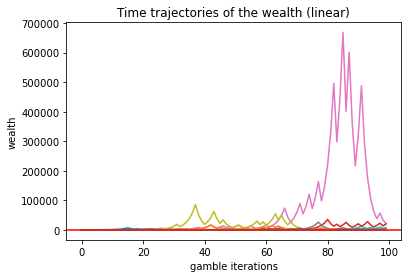

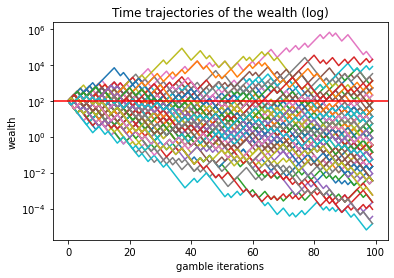

16 gamblers have more than their initial 100, N=100.


In [20]:
# N = 100

plt.plot(df.iloc[:,100:200].index, df.iloc[:,100:200])
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (linear)')
plt.xlabel('gamble iterations')
plt.ylabel('wealth')
plt.show()


plt.plot(df.iloc[:,100:200].index, df.iloc[:,100:200])
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (log)')
plt.xlabel('gamble iterations')
plt.ylabel('wealth')
plt.yscale('log')
plt.show()


print(f'{(df.iloc[:,100:200].iloc[99] > 100).sum()} gamblers have more than their initial 100, N=100.')

In [21]:
# when N = 1000
N,w = 1000,100
prob = pd.DataFrame(np.random.rand(N,w)) 
prob = prob.add_prefix('prob_')

values = pd.DataFrame(100*np.ones((N,w)))
values = values.add_prefix('balance_')
df = pd.concat([prob,values],axis=1)

for i in range(0,N-1):
    for j in np.arange(w,2*w):
        if df.iloc[i,j-w] >= 0.5:   
            df.iloc[i+1,j] = 1.5 * df.iloc[i,j]  
        else:
            df.iloc[i+1,j] = 0.6 * df.iloc[i,j] 
df


,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_90,balance_91,balance_92,balance_93,balance_94,balance_95,balance_96,balance_97,balance_98,balance_99
0,0.503059,0.424531,0.162803,0.426186,0.241620,0.008835,0.121184,0.019016,0.216881,0.736510,...,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
1,0.954350,0.526198,0.277177,0.219907,0.157060,0.197624,0.971817,0.834039,0.962691,0.617060,...,6.000000e+01,6.000000e+01,1.500000e+02,1.500000e+02,6.000000e+01,1.500000e+02,6.000000e+01,6.000000e+01,6.000000e+01,6.000000e+01
2,0.268495,0.464650,0.722987,0.568205,0.640785,0.504398,0.283433,0.191979,0.223041,0.863975,...,9.000000e+01,3.600000e+01,2.250000e+02,9.000000e+01,9.000000e+01,2.250000e+02,3.600000e+01,9.000000e+01,3.600000e+01,3.600000e+01
3,0.693812,0.185899,0.424092,0.417096,0.354262,0.028993,0.229931,0.094595,0.378464,0.280083,...,5.400000e+01,5.400000e+01,3.375000e+02,1.350000e+02,1.350000e+02,1.350000e+02,5.400000e+01,1.350000e+02,2.160000e+01,2.160000e+01
4,0.131952,0.919933,0.371331,0.438437,0.437062,0.848305,0.305775,0.831962,0.058405,0.002050,...,3.240000e+01,8.100000e+01,2.025000e+02,8.100000e+01,2.025000e+02,2.025000e+02,8.100000e+01,8.100000e+01,3.240000e+01,1.296000e+01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.512372,0.208493,0.756204,0.428463,0.219132,0.822406,0.208820,0.491725,0.089797,0.350217,...,6.800776e-21,2.533486e-15,2.852452e-25,9.896431e-14,8.028939e-35,6.963994e-23,2.656553e-19,2.720310e-21,7.302277e-27,4.785621e-30
996,0.387568,0.323434,0.998920,0.586838,0.780550,0.828522,0.583445,0.674817,0.253818,0.836427,...,4.080465e-21,1.520092e-15,4.278678e-25,1.484465e-13,1.204341e-34,4.178397e-23,1.593932e-19,1.632186e-21,4.381366e-27,2.871372e-30
997,0.848232,0.489751,0.704237,0.738995,0.138400,0.119479,0.711938,0.520462,0.355868,0.529367,...,6.120698e-21,9.120551e-16,6.418017e-25,2.226697e-13,7.226045e-35,6.267595e-23,9.563591e-20,9.793117e-22,6.572050e-27,1.722823e-30
998,0.113432,0.033021,0.242449,0.710525,0.570085,0.734794,0.959651,0.314640,0.567528,0.783830,...,3.672419e-21,5.472331e-16,3.850810e-25,3.340046e-13,4.335627e-35,3.760557e-23,1.434539e-19,5.875870e-22,3.943230e-27,2.584235e-30


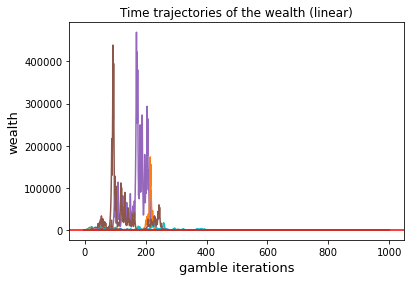

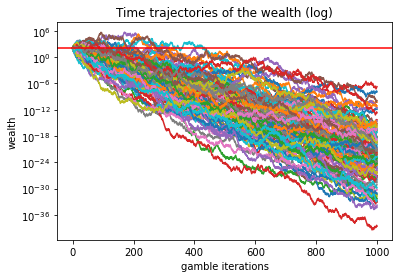

0 gamblers have more than their initial 100, N=1000.


In [22]:


plt.plot(df.iloc[:,100:200].index, df.iloc[:,100:200])
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (linear)')
plt.xlabel('gamble iterations', fontsize=13)
plt.ylabel('wealth', fontsize=13)
plt.show()


plt.plot(df.iloc[:,100:200].index, df.iloc[:,100:200])
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (log)')
plt.xlabel('gamble iterations')
plt.ylabel('wealth')
plt.yscale('log')
plt.show()

print(f'{(df.iloc[:,100:200].iloc[999] > 100).sum()} gamblers have more than their initial 100, N=1000.')

5. Plot the time trajectories of the **mean** and **median** wealth at every time point from
0 to 1,000. Try both linear and logarithmic scaler for the wealth axis. What are your
observations?

<div style='color:green'>By looking at the graph, we can clearly see that as the number of throws increases, the mean and the median decrease. The linear scale contains a lot of noise because some people may make a lot of money, but others may lose a lot of money, so that outliers may cause many fluctuations in the mean plot, but the median graph is smoother. The log scale makes the downward trend more pronounced, and the median is still softer than the mean. By comparing the linear scale and the logarithmic scale, we can clearly see that both the mean and the median have heavy-tailed distributions, i.e., some small values ​​are spread out to the right tail, while large values ​​are compressed to the left; on the other hand, for Logically stabilize noise in distribution and convert it to a more linear relationship because the variance does not depend on the mean on a logarithmic scale.


In [23]:
MeanMedian = pd.DataFrame([df.iloc[:,100:200].mean(axis=1), df.iloc[:,100:200].median(axis=1)]).transpose()
MeanMedian.columns = ['Mean','Median']
MeanMedian

,Mean,Median
0,1.000000e+02,1.000000e+02
1,1.014000e+02,6.000000e+01
2,9.999000e+01,9.000000e+01
3,1.079460e+02,5.400000e+01
4,1.198071e+02,8.100000e+01
...,...,...
995,1.071469e-09,4.874796e-23
996,6.435270e-10,4.178397e-23
997,9.642715e-10,4.387316e-23
998,1.445074e-09,2.632390e-23


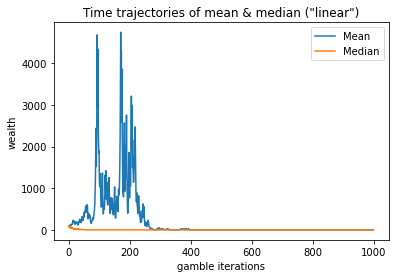

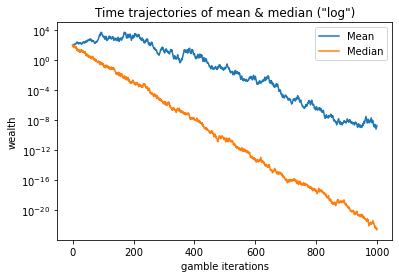

In [24]:
plt.plot(MeanMedian.index, MeanMedian)
plt.title('Time trajectories of mean & median ("linear")')
plt.xlabel('gamble iterations')
plt.ylabel('wealth') 
plt.yscale('linear')
plt.legend(MeanMedian.columns, loc='best')
plt.show()

plt.plot(MeanMedian.index, MeanMedian)
plt.title('Time trajectories of mean & median ("log")')
plt.xlabel('gamble iterations')
plt.ylabel('wealth') 
plt.yscale('log')
plt.legend(MeanMedian.columns, loc='best')
plt.show()

6. Repeat steps 3-5 with N=10 and w=1,000 with the following logic:


$$
Balance^i=\begin{equation}
\left\{ 
  \begin{aligned}
    Balance^{i-1} + 50, \text{if}\; prob^{i-1}\geq0.5\\
    Balance^{i-1} - 40, \text{if}\; prob^{i-1}\lt0.5\\
  \end{aligned}
  \right.
\end{equation}
$$


How are the results different than the previous logic?



<div style='color:green'>The linear result differs from the previous plot, with an increasing trend for both values. And the mean seems to be more linear. The median shows some peaks. The log scale results, the median does not establish a linear relationship, and both are increasing. Apart from the trend, the exact behavior of linear and log plots may be due to a lack of throws. And it should be noted that it looks like the model of the binominal option,which is a type of derivative pricing models.

In [25]:
N,w = 10,1000
prob = pd.DataFrame(np.random.rand(N,w)) 
prob = prob.add_prefix('prob_')
value = 100 * pd.DataFrame(np.ones(shape=(N,w)))
value = value.add_prefix('balance_')
df = pd.concat([prob,value],axis=1)

for i in range(0,N-1):
    for j in np.arange(w,2*w):
        if df.iloc[i,j-w] >= 0.5:   
            df.iloc[i+1,j] = df.iloc[i,j] + 50 
        else:
            df.iloc[i+1,j] = df.iloc[i,j] - 40

# wealth = df.iloc[:,w:2*w]
# wealth

df

,prob_0,prob_1,prob_2,prob_3,prob_4,prob_5,prob_6,prob_7,prob_8,prob_9,...,balance_990,balance_991,balance_992,balance_993,balance_994,balance_995,balance_996,balance_997,balance_998,balance_999
0,0.781602,0.537659,0.414872,0.180852,0.079547,0.629152,0.707227,0.957087,0.345371,0.203841,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,0.955075,0.104918,0.896667,0.796744,0.042335,0.168040,0.926139,0.011558,0.832445,0.264555,...,150.0,150.0,150.0,150.0,60.0,150.0,150.0,150.0,150.0,150.0
2,0.319328,0.294665,0.195033,0.582382,0.772060,0.254132,0.851080,0.864451,0.621554,0.525087,...,200.0,110.0,110.0,200.0,20.0,110.0,110.0,110.0,110.0,200.0
3,0.665904,0.441881,0.595753,0.636634,0.937020,0.134580,0.256382,0.705545,0.021539,0.680309,...,250.0,160.0,160.0,250.0,70.0,160.0,160.0,70.0,70.0,250.0
4,0.896262,0.256609,0.479453,0.381836,0.045474,0.894034,0.512418,0.765480,0.705515,0.397029,...,210.0,210.0,120.0,210.0,30.0,120.0,210.0,120.0,30.0,300.0
5,0.244871,0.364046,0.180834,0.122077,0.613678,0.492311,0.131651,0.322164,0.757409,0.237336,...,260.0,170.0,170.0,170.0,-10.0,80.0,170.0,170.0,-10.0,350.0
6,0.129491,0.637104,0.187743,0.825937,0.139510,0.852799,0.056265,0.930971,0.974607,0.731564,...,220.0,130.0,220.0,130.0,40.0,40.0,220.0,130.0,-50.0,400.0
7,0.080824,0.546645,0.764008,0.528828,0.532113,0.714148,0.597934,0.455685,0.718626,0.535438,...,180.0,90.0,270.0,180.0,90.0,90.0,270.0,90.0,-90.0,450.0
8,0.677080,0.083302,0.180314,0.412768,0.074320,0.567818,0.635061,0.164363,0.599916,0.143030,...,140.0,140.0,320.0,230.0,50.0,50.0,230.0,140.0,-40.0,500.0
9,0.716963,0.028395,0.433311,0.683741,0.244662,0.822345,0.002129,0.071452,0.462078,0.061067,...,100.0,190.0,370.0,280.0,100.0,100.0,280.0,190.0,-80.0,460.0


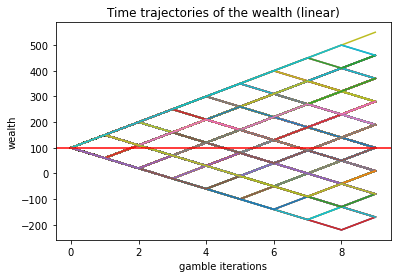

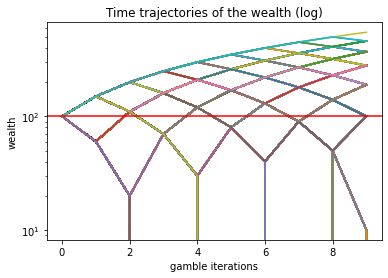

505 gamblers have more than their initial 100


In [26]:

plt.plot(df.iloc[:,w:2*w].index, df.iloc[:,w:2*w])
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (linear)')
plt.xlabel('gamble iterations')
plt.ylabel('wealth')
plt.show()


plt.plot(df.iloc[:,w:2*w].index, df.iloc[:,w:2*w])
plt.axhline(y=100, color='r', linestyle='-')
plt.title('Time trajectories of the wealth (log)')
plt.xlabel('gamble iterations')
plt.ylabel('wealth')
plt.yscale('log')
plt.show()

print(f'{(df.iloc[:,w:2*w].iloc[9] > 100).sum()} gamblers have more than their initial 100')

In [27]:
MeanMedian = pd.DataFrame([df.iloc[:,w:2*w].mean(axis=1), df.iloc[:,w:2*w].median(axis=1)]).transpose()
MeanMedian.columns = ['Mean','Median']
MeanMedian

,Mean,Median
0,100.00,100.0
1,104.46,60.0
2,109.73,110.0
3,112.21,160.0
4,117.84,120.0
5,124.28,80.0
6,129.19,130.0
7,134.28,180.0
8,140.90,140.0
9,146.89,190.0


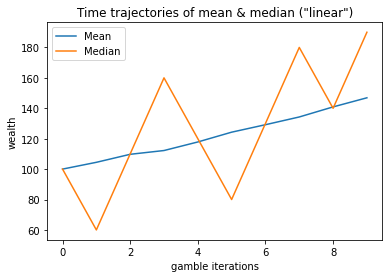

In [30]:
plt.plot(MeanMedian.index, MeanMedian)
plt.title('Time trajectories of mean & median ("linear")')
plt.xlabel('gamble iterations')
plt.ylabel('wealth') 
plt.yscale('linear')
plt.legend(MeanMedian.columns, loc='best')
plt.show()



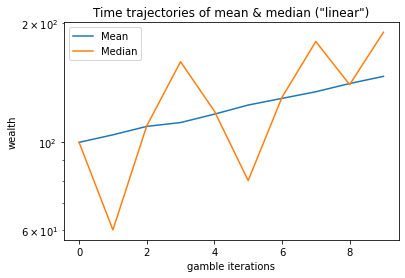

In [31]:
plt.plot(MeanMedian.index, MeanMedian)
plt.title('Time trajectories of mean & median ("linear")')
plt.xlabel('gamble iterations')
plt.ylabel('wealth') 
plt.yscale('log')
plt.legend(MeanMedian.columns, loc='best')
plt.show()